In [1416]:
import numpy as np
import sympy as sym
import math
import matplotlib.pyplot as plt

In [1417]:
v = sym.Symbol('v',real=True)

In [1418]:
def GetLaguerre (n,v):
    
    if n == 0:
        poli = sym.Number(1)
    elif n ==1:
        poli = (1-v)
    else:
        poli = ((2*n-1-v)*GetLaguerre(n-1,v)-(n-1)*GetLaguerre(n-2,v))/n
        
    return sym.expand(poli,v)

In [1419]:
GetLaguerre(3,v)

-v**3/6 + 3*v**2/2 - 3*v + 1

In [1420]:
def derivadasLaguerre(n,v):
    
    derivadas = GetLaguerre(n,v)
    
    return sym.diff(derivadas,v,1)

In [1421]:
def GetNewton(f,df,vn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            vn1 = vn - f(vn)/df(vn)
            
            error = np.abs(f(vn)/df(vn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        vn = vn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return vn

In [1422]:
def GetRoots(f,df,v,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in v:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [1423]:
def GetAllRootsGLag(n):
    
    vn = np.linspace(0,n+(n-1)*np.sqrt(n),100)
    
    Laguerre = []
    D_Laguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,v))
        D_Laguerre.append(derivadasLaguerre(i,v))
    
    poli = sym.lambdify([v],Laguerre[n],'numpy')
    D_poli = sym.lambdify([v],D_Laguerre[n],'numpy')
    Roots = GetRoots(poli,D_poli,vn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [1424]:
GetAllRootsGLag(3)

array([0.41577456, 2.29428036, 6.28994508])

In [1425]:
def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)

    Laguerre = []
    
    for i in range(n+2):
        Laguerre.append(GetLaguerre(i,v))
    
    poli = sym.lambdify([v],Laguerre[n+1],'numpy')
    Weights = Roots/(((n+1)**2)*(poli(Roots)**2))
    
    return Weights

In [1426]:
GetWeightsGLag(3)

array([0.71109301, 0.27851773, 0.01038926])

In [1427]:
raices = GetAllRootsGLag(3)

In [1428]:
pesos = GetWeightsGLag(3)

In [1429]:
funcion = lambda u: (2/(np.sqrt(np.pi)))*(np.sqrt(u))

In [1430]:
I = 0
for i in range(3):
    I += pesos[i]*funcion(raices[i])

In [1431]:
I

1.0228085228556183

In [1465]:
"Parte 2"

'Parte 2'

In [1433]:
def probabilidad(M,t):
    
    vel = np.linspace(0,1000,500)
    
    prob = []
    
    parte_1 = (np.pi*4)*((M/((np.pi*2)*8.314*t))**(3/2))
    
    
    for v in vel:
    
        parte_2 = (v**2)*(math.e)**((-1)*((M *v**2)/(2*8.314*t)))

            
        respuesta = parte_1*parte_2
    
        prob.append(respuesta)
        
    return prob,vel

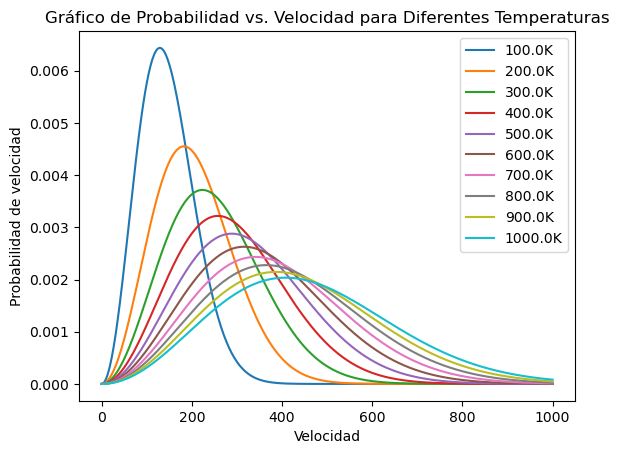

In [1435]:

M = 0.1
temperatura = np.linspace(100,1000,10)

plt.figure()

for t in temperatura:
    
    resultado,vel = probabilidad(M,t)

    label = str(t)+"K"

    plt.plot(vel,resultado,label=label)
    
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Probabilidad de velocidad')
plt.title('Gráfico de Probabilidad vs. Velocidad para Diferentes Temperaturas')

plt.show()

        
    

In [1467]:
"A medida que aumenta la temperatura, la velocidad más probable también aumenta. Así mismo, existe una mayor posibilidad de obtener esta probabilidad, pues cada vez se asemeja más a una campana de Gauss."

'A medida que aumenta la temperatura, la velocidad más probable también aumenta. Así mismo, existe una mayor posibilidad de obtener esta probabilidad, pues cada vez se asemeja más a una campana de Gauss.'

In [1466]:
"Parte 3"

'Parte 3'

[0.0, 46.244221201072165, 65.39920480393766, 80.09734067671083, 92.48844240214433, 103.4052221721343, 113.27474549502264, 122.35070887189761, 130.79840960787533, 138.7326636032165, 146.23706761603543, 153.37473044615464, 160.19468135342166, 166.73591073436455, 173.03003185259973, 179.1030985700844, 184.97688480428866, 190.6698085864481, 196.197614411813, 201.57388693821466, 206.8104443442686, 211.91764410819485, 216.90462392226965, 221.7794938071482, 226.54949099004529, 231.2211060053608, 235.8001862951681, 240.29202203013247, 244.70141774379522, 249.03275254535708, 253.29003106085867, 257.47692679015813, 261.59681921575066, 265.65282572992106, 269.64782923803693, 273.58450213284965, 277.465327206433, 281.2926159647043, 285.06852472828405, 288.7950688381884, 292.47413523207086, 296.1074936137911, 299.696806403964, 303.24363763025394, 306.7494608923093, 310.21566651640296, 313.64356799830887, 317.0344078190939, 320.3893627068433, 323.7095484075051, 326.9960240196883, 330.2497959411607, 

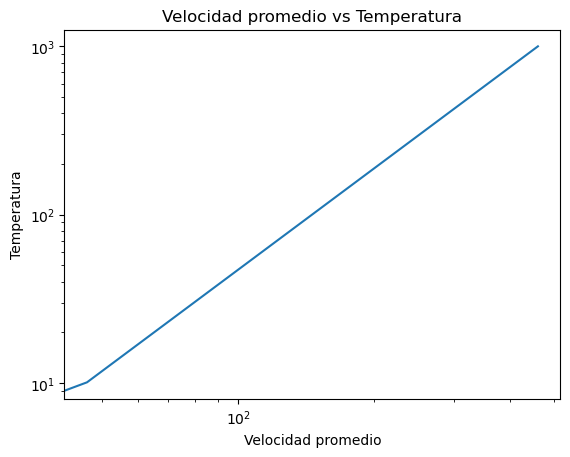

In [1460]:
M = 0.1
tem = np.linspace(0,1000,100)

valores = []

for T in tem:
    
    funcion_2 = lambda u: np.sqrt((2*u*8.314*T)/M)*(2/(np.sqrt(np.pi)))*(np.sqrt(u))
    
    V_prom = 0
    
    for i in range(3):
        
        V_prom += pesos[i]*funcion_2(raices[i])
        
    valores.append(V_prom)
    
print(valores)
        
plt.figure()
plt.loglog(valores,tem)
    
plt.xlabel("Velocidad promedio")
plt.ylabel("Temperatura")
plt.title('Velocidad promedio vs Temperatura')
    
plt.show()

In [1438]:
def velocidad_teorica(M,tem):
    
    valores = []
    
    for t in tem:
        
        v = np.sqrt((8*8.314*t)/((np.pi))*M)
        
        valores.append(v)
        
    return(valores)

[0.0, 46.244221205843424, 65.39920481068525, 80.0973406849749, 92.48844241168685, 103.40522218280319, 113.27474550670979, 122.35070888452117, 130.7984096213705, 138.73266361753025, 146.2370676311235, 153.37473046197917, 160.1946813699498, 166.73591075156762, 173.03003187045218, 179.10309858856343, 184.9768848233737, 190.6698086061205, 196.19761443205573, 201.5738869590121, 206.81044436560637, 211.9176441300595, 216.90462394464882, 221.77949383003042, 226.54949101341958, 231.22110602921708, 235.80018631949685, 240.29202205492464, 244.70141776904234, 249.03275257105113, 253.29003108699195, 257.4769268167234, 261.596819242741, 265.65282575732994, 269.6478292658579, 273.5845021610768, 277.4653272350605, 281.2926159937267, 285.0685247576961, 288.7950688679849, 292.474135262247, 296.1074936443421, 299.6968064348853, 303.24363766154113, 306.74946092395834, 310.2156665484095, 313.64356803066914, 317.03440785180396, 320.3893627398996, 323.7095484409039, 326.99602405342625, 330.24979597523435, 3

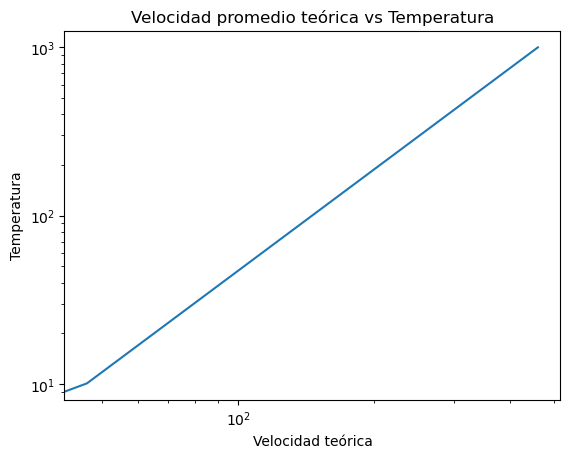

In [1464]:
tem = np.linspace(0,1000,100)
v = velocidad_teorica(10,tem)

print(v)

plt.figure()

plt.loglog(v,tem)

plt.xlabel("Velocidad teórica")
plt.ylabel("Temperatura")
plt.title('Velocidad promedio teórica vs Temperatura')

plt.show()

In [1440]:
"Parte_4"

'Parte_4'

[0.0, 50.062609234797726, 70.7992209476355, 86.71098275413655, 100.12521846959545, 111.94339738001645, 122.62784781759946, 132.4532140182804, 141.598441895271, 150.18782770439321, 158.31187079294006, 166.03889085800535, 173.4219655082731, 180.50330457958026, 187.31713164455826, 193.89165183406126, 200.2504369391909, 206.41342576909318, 212.39766284290653, 218.2178545044494, 223.8867947600329, 229.41569630545587, 234.81445133277725, 240.09183950752941, 245.25569563519892, 250.31304617398865, 255.270221389604, 260.1329482624096, 264.9064280365608, 269.5954014045596, 274.2042036546516, 278.736811607792, 283.196883790542, 287.58779499844877, 291.9126661785437, 296.174390383203, 300.37565540878643, 304.51896362238926, 308.60664939215116, 312.64089446591305, 316.6237415858801, 320.5571065804629, 324.44278913644285, 328.28248242333973, 332.0777817160107, 335.8301921400494, 339.54113564665255, 343.2119573086209, 346.8439310165462, 350.43826464358415, 353.99610473817756, 357.51854079641635, 361

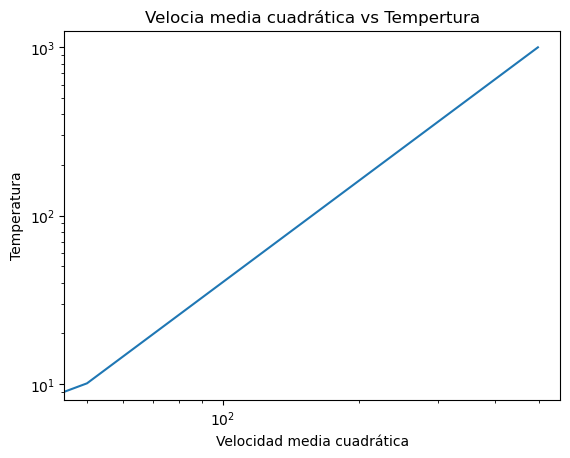

In [1462]:
M = 0.1
tem = np.linspace(0,1000,100)

valores_1 = []

for T in tem:

    funcion_3 = lambda u: ((2*u*8.314*T)/M)*(2/(np.sqrt(np.pi)))*(np.sqrt(u))

    V_med = 0
    
    for i in range(3):
        V_med += pesos[i]*funcion_3(raices[i])
        
    V_med = np.sqrt(V_med)
        
    valores_1.append(V_med)
    
print(valores_1)
        
plt.figure()
plt.loglog(valores_1,tem)
    
plt.xlabel("Velocidad media cuadrática")
plt.ylabel("Temperatura")
plt.title("Velocia media cuadrática vs Tempertura")
    
plt.show()

In [1442]:
V_med

2481.202194962095

In [1443]:
"Parte teórica"

'Parte teórica'

In [1444]:
def velocidadm_teorica(M,tem):
    
    valores = []
    
    for t in tem:
        
        v = np.sqrt((3*8.314*t)/M)
        
        valores.append(v)
        
    return(valores)

[0.0, 5.019356472092752, 7.098441997218741, 8.69378043096432, 10.038712944185503, 11.223622274902919, 12.294862193763555, 13.279968966739935, 14.196883994437481, 15.058069416278254, 15.872598840120478, 16.647322106973643, 17.38756086192864, 18.097547129962447, 18.78071222065743, 19.43988402509364, 20.077425888371007, 20.69533690706604, 21.295325991656224, 21.878867623459136, 22.447244549805838, 23.001580973331535, 23.542868700875573, 24.071987995606136, 24.58972438752711, 25.096782360463756, 25.593796596879177, 26.08134129289296, 26.55993793347987, 27.030061827976684, 27.4921476392475, 27.946594089658245, 28.393767988874963, 28.83400769924292, 29.267626131853252, 29.69491334871814, 30.11613883255651, 30.531553474655652, 30.94139132246152, 31.34587112146728, 31.745197680240956, 32.13956308277253, 32.52914776850839, 32.91412149730559, 33.29464421394729, 33.67086682470875, 34.042931896668534, 34.41097428895543, 34.77512172385728, 35.13549530464926, 35.492209986093705, 35.84537500279372, 3

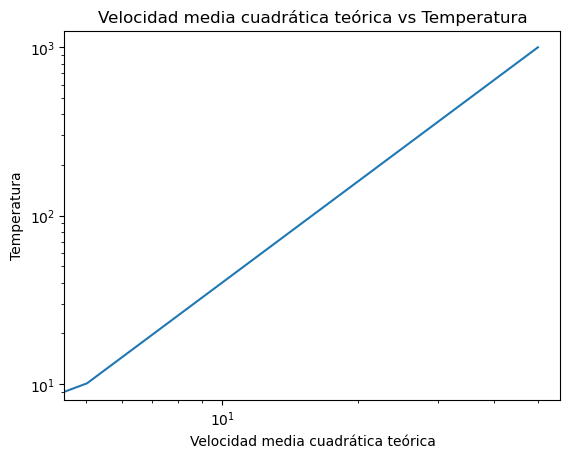

In [1463]:
tem = np.linspace(0,1000,100)
v = velocidadm_teorica(10,tem)

print(v)

plt.figure()

plt.loglog(v,tem)

plt.xlabel("Velocidad media cuadrática teórica")
plt.ylabel("Temperatura")
plt.title("Velocidad media cuadrática teórica vs Temperatura")

plt.show()